In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Solución Numérica de Problemas de Valor Inicial de EDO

Muchos sistemas físicos, biológicos y sociales pueden representarse como un sistema de ecuaciones diferenciales ordinarias (EDOs). En el caso en que el estado (valor) inicial es conocido, los problemas se pueden escribir como:

$$
    \frac{\text{d} \vec{\!u}}{\text{d}t} = \vec{\!f}(t, \vec{\!u}) \quad \vec{\!u}(0) = \vec{\!u}_0
$$

donde:
 - $\vec{\!u}(t)$ es el vector de estado.
 - $\vec{\!f}(t, \vec{\!u})$ es una función vectorial que controla el crecimiento de $\vec{\!u}$ en el tiempo.
 - $\vec{\!u}(0)$ es la condición inicial en el tiempo $t = 0$.

## Ejemplo: 

Analizaremos un problema simple de transferencia de calor mostrado esquemáticamente a continuación. La EDO que describe la temperatura como función del tiempo es:

$$\frac{dT}{dt} = -\frac{k}{c}(T - T_w)$$

con $T(0) = T_0$.

### Método de Euler

Notación

$$\frac{dy}{dt} = f(t, y)$$

con
$$y(t_0) = y_0$$

Sea $h$ un intervalo de tiempo muy pequeño

$$t_{n+1} = t_n + h$$

$$y_{n+1} = y_n + h f(t_n, y_n)$$

In [2]:
def heat_equations(t, T):
    k = 0.075
    C = 10
    T_w = 20

    return -k * (T - T_w) / C

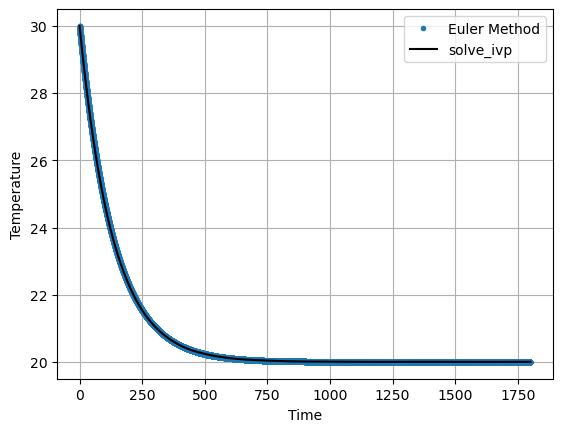

In [3]:
t_eval = np.linspace(0, 1800, 1800)
tspan = (t_eval[0], t_eval[-1])

sol_temp = solve_ivp(heat_equations, tspan, (30, ), t_eval = t_eval)

t = 0
T = 30
time = [];  time.append(t)
temperature = []; temperature.append(T)

h = 0.1
while t <= 1800:
    T = T + h * heat_equations(t, T)
    t = t + h
    time.append(t)
    temperature.append(T)
    
plt.plot(time, temperature, '.', label='Euler Method')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()

In [5]:
def euler_method(F, x0, y0, x, h):
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        y0 = y0 + h * F(x0, y0)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

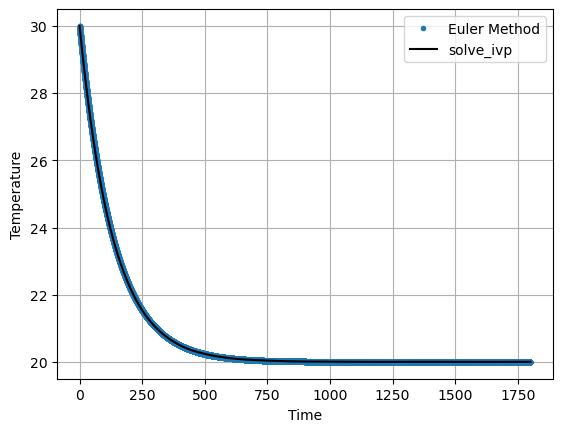

In [6]:
# Define the initial conditions and parameters
T0 = 30  # Initial temperature
t0 = 0  # Initial time
tf = 1800  # Final time
h = 0.1  # Time step

# Apply the Euler method to the heat equation
time_euler, temperature_euler = euler_method(heat_equations, t0, T0, tf, h)

# Plot the results
plt.plot(time_euler, temperature_euler, '.', label='Euler Method')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

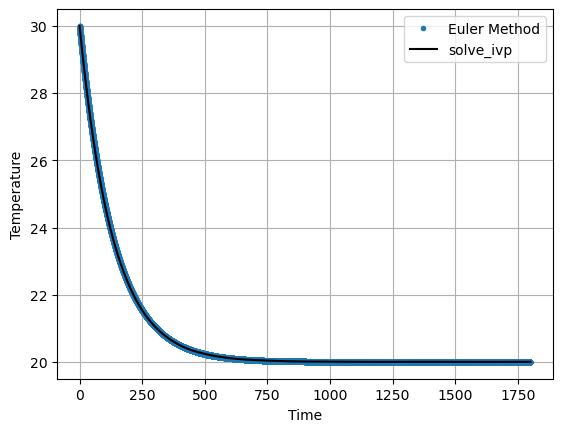

In [8]:
lambda_heat = lambda t, T: -0.075 * (T - 20) / 10    # Define the heat equation

T0 = 30  # Initial temperature
t0 = 0  # Initial time
tf = 1800  # Final time
h = 0.1  # Time step

# Apply the Euler method to the heat equation
time_euler, temperature_euler = euler_method(lambda_heat, t0, T0, tf, h)

# Plot the results
plt.plot(time_euler, temperature_euler, '.', label='Euler Method')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

# Ecuaciones Diferenciales Ordinarias de Segundo Orden (Oscilaciones)

Según la ley de Newton, tenemos:

$$F = m\frac{d^2x}{dt^2} = - kx$$

Reorganizando, obtenemos:

$$\frac{d^2x}{dt^2} + \frac{k}{m}x = 0$$

Esto tiene una solución de la forma:

$$x = A\cos\left(\sqrt{\frac{k}{m}t} + \phi\right)$$

Tomaremos los siguientes valores para la masa y la constante del resorte:  
$k = 0.5$  
$m = 1$  

Las condiciones iniciales son:  
$x(0) = 2$  
$v(0) = 0$  

Lo cual implica que $\phi = 0$ y $A = 2$.  
Por lo tanto:

$$x(t) = 2\cos\left(\sqrt{\frac{k}{m}t}\right)$$

Para soluciones numéricas, podemos escribir la ecuación de segundo orden como un sistema de dos ecuaciones de primer orden acopladas:

$$\frac{dx}{dt} = V$$  
y  
$$\frac{dV}{dt} = -\frac{k}{m}x$$

Cuando usamos el algoritmo de Euler en este caso, obtenemos resultados muy pobres. Ver más abajo.

Sin embargo, podemos ajustar esta idea básica para obtener una mejor aproximación a la solución real. Primero, actualizamos la velocidad y luego usamos la velocidad actualizada para calcular la nueva posición. A esto se suele llamar el **método de Euler-Cromer**.

In [12]:
#  Funcion que devuelve la derivada
def functions(t, x):
    
    k = 0.5
    m = 1
    
    fprime = np.zeros((2, ))
    
    fprime[0] = x[1]
    fprime[1] = -k/m * x[0]
    
    return fprime

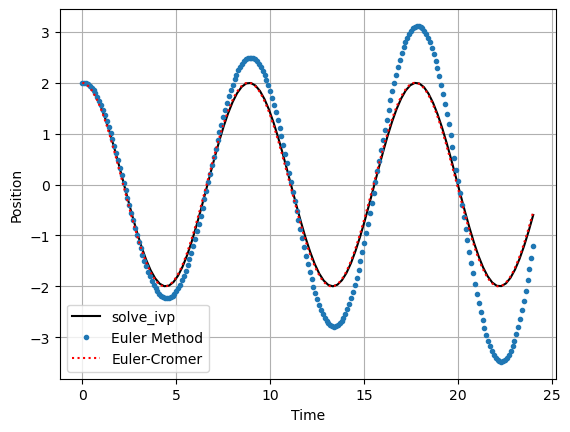

In [13]:
t_eval = np.linspace(0, 24, 100)
tspan = (t_eval[0], t_eval[-1])
x0 = [2, 0]

sol = solve_ivp(equations, tspan, x0, t_eval = t_eval)

plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')


#  Metodo Euler
t = 0
x = 2
V = 0
h = 0.1

time = []; time.append(t)
position = []; position.append(x)
velocity = []; velocity.append(V)

while t <= 24:
    fprime = functions(t, [x, V])
    x = x + h * fprime[0]
    V = V + h * fprime[1]

    
    position.append(x)
    velocity.append(V)
    
    t = t + h
    time.append(t)
    
plt.plot(time, position, '.', label="Euler Method")
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)

#  Euler-Cromer method
t = 0
x = 2
V = 0
h = 0.1
time_ec = []; time_ec.append(t)
position_ec = []; position_ec.append(x)
velocity_ec = []; velocity_ec.append(V)

while t <= 24:
    fprime = functions(t, [x, V])

    V = V + h * fprime[1]
    x = x + h * V
    
    position_ec.append(x)
    velocity.append(V)
    
    t = t + h
    time_ec.append(t)
    
plt.plot(time_ec, position_ec, 'r:', label='Euler-Cromer')
plt.legend()

## Métodos de Runge-Kutta

### Método de Runge-Kutta de Segundo Orden

El método de Runge-Kutta de segundo orden se obtiene mediante la siguiente iteración:

$$
\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{F}\left[x+\frac{h}{2}, \textbf{y}\left(x+\frac{h}{2}\right)\right]
$$

donde:

$$
\textbf{y}\left(x+\frac{h}{2}\right) = \textbf{y}(x) + \frac{h}{2}\textbf{F}(x, \textbf{y})
$$

Esto da:

$$
\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{F}\left[x+\frac{h}{2}, \textbf{y}+\frac{h}{2}\textbf{F}(x, \textbf{y})\right]
$$

Las siguientes notaciones se utilizan con frecuencia:

* $\textbf{k}_0 = \textbf{F}(x, \textbf{y})$: derivada de $\textbf{y}$ en $x$.
* $\textbf{k}_1 = \textbf{F}\left(x+\frac{h}{2}, \textbf{y}+\frac{h}{2}\textbf{k}_0\right)$: derivada de $\textbf{y}$ en $x+\frac{h}{2}$, donde $\textbf{y}\left(x+\frac{h}{2}\right)$ se estima a partir de $\textbf{y}(x)$ usando una extrapolación lineal con pendiente $\textbf{k}_0$.
* $\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{k}_1$

In [15]:
def runge_kutta_2(F, x0, y0, x, h):
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2, y0 + h/2*k0)
        y0 = y0 + h*k1
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

Aplicamos este método al problema de transferencia de calor

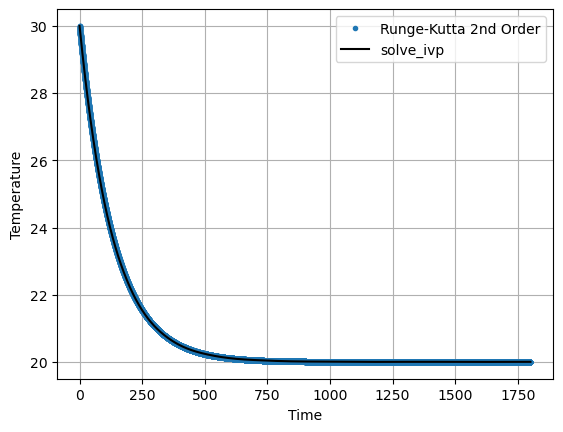

In [18]:
# Define the initial conditions and parameters
T0 = 30  # Initial temperature
t0 = 0  # Initial time
tf = 1800  # Final time
h = 0.1  # Time step

# Apply the Runge-Kutta 2nd order method to the heat equation
time_rk2, temperature_rk2 = runge_kutta_2(heat_equations, t0, T0, tf, h)

# Plot the results
plt.plot(time_rk2, temperature_rk2, '.', label='Runge-Kutta 2nd Order')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

Ahora aplicamos el método de Runge-Kutta de orden 2 al problema de oscilaciones

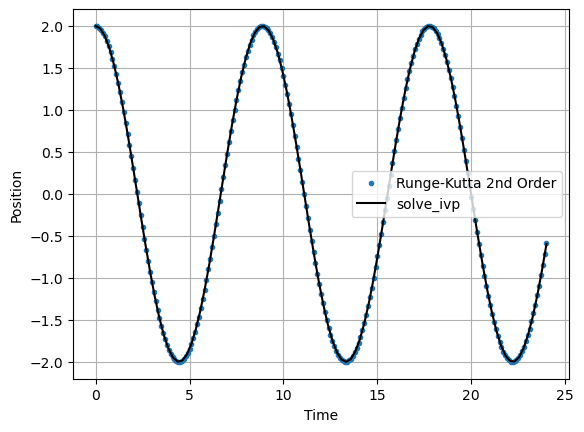

In [19]:
# Define the initial conditions and parameters
x0 = [2, 0]  # Initial position and velocity
t0 = 0  # Initial time
tf = 24  # Final time
h = 0.1  # Time step

# Apply the Runge-Kutta 2nd order method to the oscillations problem
time_rk2_osc, state_rk2_osc = runge_kutta_2(functions, t0, x0, tf, h)

# Extract position and velocity from the state
position_rk2_osc = state_rk2_osc[:, 0]
velocity_rk2_osc = state_rk2_osc[:, 1]

# Plot the results
plt.plot(time_rk2_osc, position_rk2_osc, '.', label='Runge-Kutta 2nd Order')
plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()

### Método de Runge-Kutta de Cuarto Orden

$$\frac{dy}{dt} = f(t, y)$$  
con $y(t_0) = y_0$.

Nuestra regla de actualización es:

$$t_{N+1} = t_N + h$$  
$$y_{N+1} = y_N + \frac{1}{6}h \left( k_1 + 2k_2 + 2k_3 + k_4 \right)$$

Con

$$
\begin{array}{ll}
k_1 = & f(t_N, y_N) \\
k_2 = & f\left(t_N + \frac{h}{2}, y_N + h\frac{k_1}{2} \right) \\
k_3 = & f\left(t_N + \frac{h}{2}, y_N + h\frac{k_2}{2} \right)\\
k_4 = & f(t_N + h, y_N + hk_3)
\end{array}
$$

## Ejemplo: 

Analizemos nuevamente el problema de transferencia de calor.

Text(0, 0.5, 'Temperature')

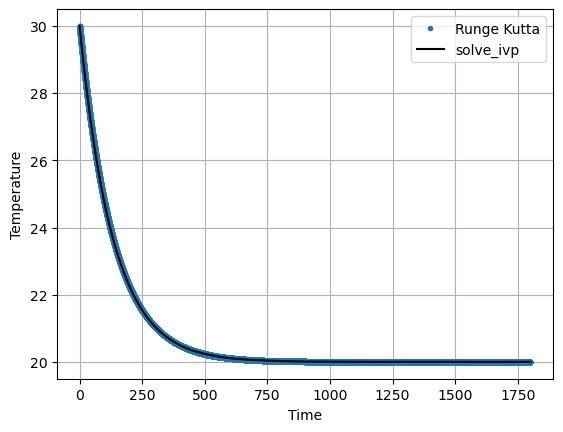

In [20]:
t = 0
T = 30
h = 0.1

time_rk = [];  time_rk.append(t)
temperature_rk = []; temperature_rk.append(T)

while t <= 1800:
    k1 = heat_equations(t, T)
    k2 = heat_equations(t + h/2, T + k1/2 * h)
    k3 = heat_equations(t + h/2, T + k2/2 * h)
    k4 = k4 = heat_equations(t + h, T + h*k3)
    
    t = t + h
    time_rk.append(t)
    
    T = T + (1.0/6.0) * h * (k1 + 2 * k2 + 2 * k4 + k4)
    temperature_rk.append(T)
    
plt.plot(time_rk, temperature_rk, '.', label='Runge Kutta')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')

In [21]:
def runge_kutta_4(F, x0, y0, x, h):
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k1 = F(x0, y0)
        k2 = F(x0 + h/2, y0 + h/2 * k1)
        k3 = F(x0 + h/2, y0 + h/2 * k2)
        k4 = F(x0 + h, y0 + h * k3)
        y0 = y0 + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return np.array(X), np.array(Y)

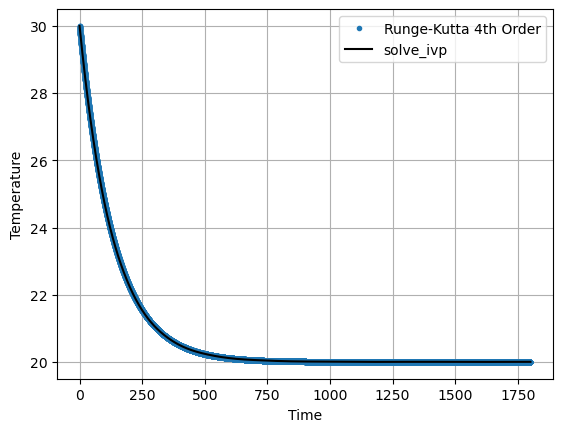

In [22]:
# Define the initial conditions and parameters
T0 = 30  # Initial temperature
t0 = 0  # Initial time
tf = 1800  # Final time
h = 0.1  # Time step

# Apply the Runge-Kutta 4th order method to the heat equation
time_rk4, temperature_rk4 = runge_kutta_4(heat_equations, t0, T0, tf, h)

# Plot the results
plt.plot(time_rk4, temperature_rk4, '.', label='Runge-Kutta 4th Order')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

## Ejemplo: 

Analizemos nuevamente el problema de oscilaciones.

Text(0, 0.5, 'Position')

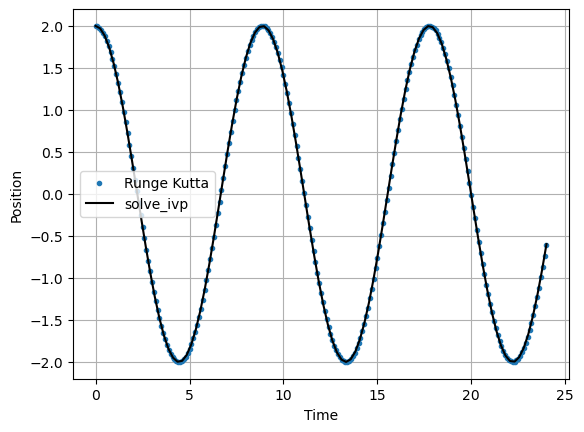

In [23]:
t = 0
x = 2
V = 0
h = 0.1

time_rk = []; time_rk.append(t)
position_rk = []; position_rk.append(x)
velocity_rk = []; velocity_rk.append(V)

while t <= 24:

    X = [x, V]
    k1 = equations(t, X)
    
    X = [x + k1[0] * h/2, V + k1[1] * h / 2]
    k2 = equations(t + h /2, X)
    
    X = [x + k2[0] * h/2, V + k2[1] * h / 2]
    k3 = equations(t + h /2, X)
    
    X = [x + h*k3[0], V + h*k3[1]]
    k4 = equations(t + h, X)
    
    t = t + h
    time_rk.append(t)
    
    x = x + 1.0/6.0 * h * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    V = V + 1.0/6.0 * h * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    
    position_rk.append(x)
    velocity_rk.append(V)
    
plt.plot(time_rk, position_rk, '.', label='Runge Kutta')
plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')

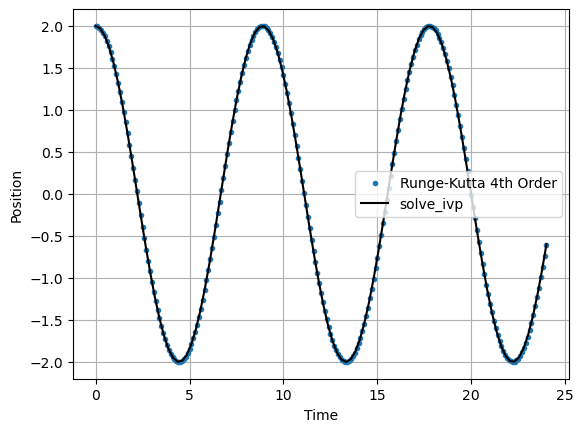

In [24]:
# Define the initial conditions and parameters
x0 = [2, 0]  # Initial position and velocity
t0 = 0  # Initial time
tf = 24  # Final time
h = 0.1  # Time step

# Apply the Runge-Kutta 4th order method to the oscillations problem
time_rk4_osc, state_rk4_osc = runge_kutta_4(equations, t0, x0, tf, h)

# Extract position and velocity from the state
position_rk4_osc = state_rk4_osc[:, 0]
velocity_rk4_osc = state_rk4_osc[:, 1]

# Plot the results
plt.plot(time_rk4_osc, position_rk4_osc, '.', label='Runge-Kutta 4th Order')
plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()